<a href="https://colab.research.google.com/github/razamehar/Brain_Tumor_3_Way_Image_Classifier/blob/main/Weather_Time_Series_Analysis_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Statistical Methods to be used for Time-Series Analysis**

---
- Naive Forecast
- Moving Average Forecast
- Differenced Moving Average Forecast, and
- Differenced Moving Average Forecast with Smoothing

**Deep Learning Models to be used for Time-Series Analysis**

---
- Simple Neural Network
- Deep Neural Network
- Single-Layer LSTM
- Single-Layer Regularized LSTM
- Bi-Directional Regularized LSTM
- Regularized Stacked GRUs
- Convolutional Layer Network stacked with a stacked GRUs and Fully Connected Layers

# Utilities

---
The utilities section encompasses essential tools for data analysis and visualization, including the import of key libraries: pandas for data manipulation, numpy for numerical operations, and matplotlib.pyplot along with seaborn for creating visualizations. It features two primary functions. The plot_series function visualizes time series data by plotting predicted values against time steps, with options for labeling and titling the plot. The data_review function provides a comprehensive overview of a DataFrame, returning details such as the number of rows, columns, and counts of missing and duplicate values, facilitating a quick assessment of the data's structure and quality.

**Imports**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Utility Functions**

---
We will place all the utility functions below to make the code more organized.


In [4]:
def plot_series(series, array_like, label='', title=''):
  """
  Visualizes time series data.

  Args:
    series (A Panda's data series): It is used to extract time step for each value.
    array_like (Either a Panda's data series or and array of int) - Predicted values for each time step.
    label (str): Label for the lines.
    title (str): Title of the plot.
  """

  data_range = range(len(series))

  plt.plot(data_range, array_like, label=label)
  plt.title(title)
  plt.legend()
  plt.grid(True)

In [5]:
def data_review(df):
  """
  Extract information about the dataframe.

  Args:
    df (A Panda's data frame): It contains the data.

  Returns:
    info (A Panda's dictionary): It contains information such as the number of columns, number of rows, and counts of missing and duplicate values in the data.
  """

  info = {
      'Number of Rows': df.shape[0],
      'Number of Columns': df.shape[1],
      'Missing Values': df.isnull().sum().sum(),
      'Duplicate Values': df.duplicated().sum(),
  }

  return info

# Data Download and Review

---
This section covers the steps for downloading and reviewing the Jena Climate dataset, which includes weather data from 2009 to 2016. The dataset is downloaded using wget and extracted from a zip file. Once extracted, the data is loaded into a Pandas DataFrame. The data_review function is used to summarize the DataFrame, providing key insights such as the number of rows, columns, and counts of missing and duplicate values. Additionally, the dataset's feature names, initial and final observations, and data types are reviewed to understand the dataset's structure and content thoroughly.

**Data Download and Extraction**

In [6]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2024-05-25 18:01:51--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.125.200, 52.217.131.128, 52.216.144.213, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.125.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  5.97MB/s    in 2.2s    

2024-05-25 18:01:54 (5.97 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]



In [7]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


**Data Loading and Review**

In [8]:
# Load data into a Pandas data frame.
file_path = '/content/jena_climate_2009_2016.csv'
data = pd.read_csv(file_path)

info = data_review(data)

# Convert info into DataFrames for clear display.
info = pd.DataFrame.from_dict(info, orient='index', columns=[''])

print('Data review:')
print(info)

Data review:
                         
Number of Rows     420451
Number of Columns      15
Missing Values          0
Duplicate Values      327


In [ ]:
# Review the feature names in the data.
data.columns.to_list()

['Date Time',
 'p (mbar)',
 'T (degC)',
 'Tpot (K)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wv (m/s)',
 'max. wv (m/s)',
 'wd (deg)']

In [ ]:
# Review the first five observations in the data.
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
# Review the last five observations in the data.
data.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420446,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420447,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420448,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420449,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420450,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [ ]:
# Review the data types of the features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho (g/m**3)     420451 non-null  float64
 12  wv (m/s)         420451 non-null  float64
 13  max. wv (m/s)    420451 non-null  float64
 14  wd (deg)         420451 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


# Data Subset Selection

---

This section contains a series of operations aimed at refining and selecting a subset of data for further analysis. Beginning with the conversion of the 'Date Time' column to a Pandas datetime feature, the process ensures compatibility for time-based operations. Subsequently, a new feature named 'Year' is created, extracting the year component from the datetime values. The dataset is then filtered to include only records falling within the years 2012 to 2016, narrowing down the focus to a specific timeframe. Following this selection, the subset's integrity and structure are assessed using the data_review() function, which provides essential details such as row and column counts, and identifies any missing or duplicate values. Finally, this information is organized into a DataFrame format for clarity and presented to offer a concise overview of the selected subset's characteristics.

In [9]:
# Convert the 'Date Time' column to a Pandas datetime feature.
data['Date Time'] = pd.to_datetime(data['Date Time'], errors='coerce')

# Create a new feature 'Year' in the dataframe.
data['Year'] = data['Date Time'].dt.year

# Select data corresponding to the years 2012 to 2016 inclusive.
data = data[(data["Year"] >= 2012) & (data["Year"] <= 2016)]

In [10]:
# Review the subset data.
info = data_review(data)

# Convert info into DataFrames for clear display.
info = pd.DataFrame.from_dict(info, orient='index', columns=[''])

print('Data review:')
print(info)

Data review:
                         
Number of Rows     103668
Number of Columns      16
Missing Values          0
Duplicate Values        0


All features are of type float64 except for '*Date Time*'. This feature will be converted to the Panda's *datetime* type later.

# Descriptive Statistics

---

This section provides a summary of descriptive statistics for the dataset using the describe() function. By invoking this method on the dataset, key statistical measures such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column are generated. This summary offers valuable insights into the central tendency, variability, and distribution of the data, facilitating a better understanding of its overall characteristics.

In [ ]:
data.describe()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),Year
count,103668,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000,103668.000000
mean,2014-06-22 13:38:06.132654080,989.738072,10.067692,284.069849,5.493676,75.628394,14.129555,9.878911,4.250542,6.237580,9.983360,1213.902558,2.111799,3.525734,174.524132,2013.999884
min,2012-01-01 00:00:00,956.890000,-21.040000,251.480000,-23.390000,23.770000,1.130000,0.920000,0.000000,0.570000,0.910000,1101.070000,0.100000,0.200000,0.000000,2012.000000
25%,2013-03-12 23:27:30,984.580000,3.970000,278.000000,0.650000,65.210000,8.120000,6.400000,0.970000,4.040000,6.480000,1185.390000,0.970000,1.740000,118.500000,2013.000000
50%,2014-06-12 22:55:00,989.980000,9.740000,283.800000,5.760000,78.600000,12.080000,9.210000,2.300000,5.800000,9.300000,1211.850000,1.740000,2.960000,198.500000,2014.000000
75%,2015-09-12 22:22:30,995.530000,16.070000,290.060000,10.690000,88.600000,18.290000,12.880000,5.470000,8.130000,13.000000,1240.760000,2.840000,4.760000,234.300000,2015.000000
max,2016-12-12 23:50:00,1012.840000,37.280000,311.340000,21.910000,100.000000,63.770000,26.340000,46.010000,16.770000,26.690000,1393.540000,14.090000,20.990000,360.000000,2016.000000
std,NaN,8.738628,8.420184,8.514651,6.718406,16.162695,8.049041,4.262256,5.158484,2.702495,4.308495,40.333354,1.540889,2.359352,86.937931,1.414261


Descriptive statistics indicate that all features have different means and standard deviations. This may necessitate data standardization later.

# Statistical Analysis of Variables

---
This section delves into two key aspects of statistical analysis: univariate analysis and correlation analysis. Initially, univariate analysis is conducted to understand the distribution and normality of individual variables. Histograms are generated to visualize the distribution of selected variables, providing insights into their density and skewness. Additionally, quantile-quantile (qq) plots are utilized to assess the normality of the data, comparing each variable's distribution against a theoretical normal distribution.

Subsequently, correlation analysis is performed to explore relationships between variables. A correlation matrix is computed using Pearson correlation coefficients, focusing on the correlation of each variable with 'T (degC)', representing temperature. This matrix is visualized using a heatmap, highlighting correlation strengths through color gradients. Insights gleaned from correlation analysis offer valuable information on potential relationships and dependencies among variables, guiding further analysis and modeling endeavors.

**Univariate Analysis**

In [11]:
cols = ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)',
       'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)']

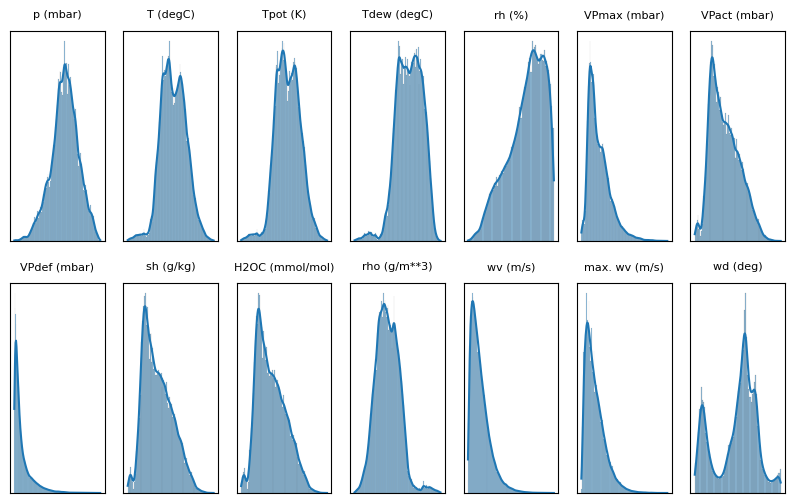

In [ ]:
# Generate Histograms to observe data distribution.

fig, axes = plt.subplots(2, 7, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
  sns.histplot(data=data, x=cols[i], kde=True, ax=ax, edgecolor = ".3")

  ax.set_title(f'{cols[i]}', pad=10, fontsize=8)
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.set_xticklabels("")
  ax.set_yticklabels("")
  ax.tick_params(axis='both', which='both', bottom=False, left=False)

It seems that the data in most of the features deviate from a normal distribution. To further assess this, we'll visualize the features' *Q-Q plots*.

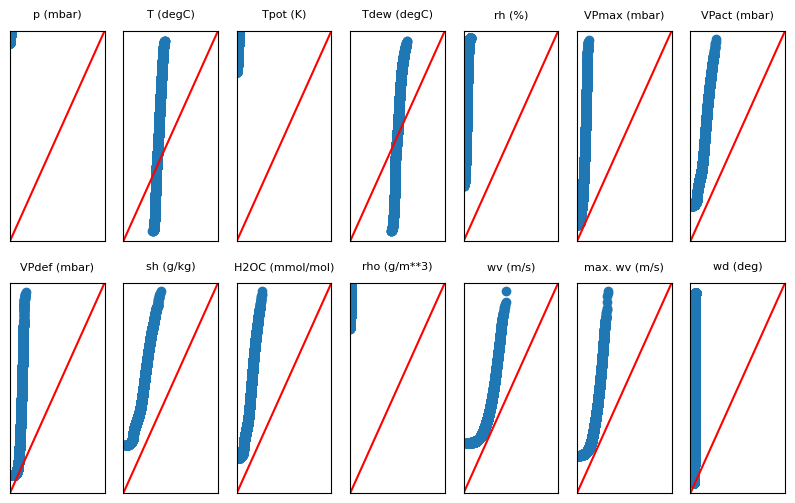

In [12]:
# Generate qqplots to check for data normality.

import statsmodels.api as sm

fig, axes = plt.subplots(2, 7, figsize = (10, 6))

for i, ax in enumerate(axes.flat):
        sm.qqplot(data = data[cols[i]], ax = ax, line = "45")
        ax.set_title(f'{cols[i]}', pad=10, fontsize=8)
        ax.set_xticklabels("")
        ax.set_yticklabels("")
        ax.tick_params(axis='both', which='both', bottom=False, left=False)
        ax.set_xlabel("")
        ax.set_ylabel("")

The data features exhibit deviations from a normal distribution, as evidenced by the *QQ plots*.

**Correlation Analysis**

In [13]:
import matplotlib.colors as mcolors

cmap = mcolors.LinearSegmentedColormap.from_list('custom_blue', ['#FFFFFF', '#84ACC8'])

corr_matrix = round(data[cols].corr(), 2)
corr_matrix['T (degC)'].sort_values(ascending=False)

T (degC)           1.00
Tpot (K)           1.00
VPmax (mbar)       0.95
Tdew (degC)        0.90
sh (g/kg)          0.87
VPact (mbar)       0.87
H2OC (mmol/mol)    0.87
VPdef (mbar)       0.76
max. wv (m/s)      0.12
wv (m/s)           0.09
wd (deg)          -0.01
p (mbar)          -0.07
rh (%)            -0.57
rho (g/m**3)      -0.96
Name: T (degC), dtype: float64

<Axes: >

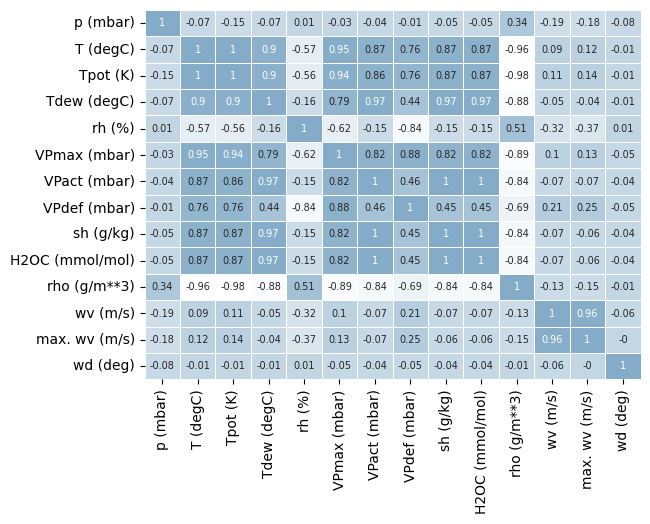

In [14]:
sns.heatmap(corr_matrix, annot = True, cmap = cmap, linewidths = 0.5, annot_kws={"size": 7}, cbar=False)

The variables *Tpot*, *VPmax*, *Tdew*, *Vpact*, *sh*, and *H2OC* show a strong and positive correlation with *T* (temperature), indicating that as the values of these variables increase, the temperature tends to increase as well. Additionally, *VPdef* exhibits a moderate positive correlation with *T*.

On the other hand, *rh* displays a moderate negative correlation with *T*, suggesting that as *rh* increases, the temperature tends to decrease. Furthermore, *rho* demonstrates a strong negative correlation with *T*.

# Data Visualization

---

This section on data visualization explores the concept of seasonality within the dataset. It begins with time series plots depicting temperature variations over time, offering insights into both long-term trends and shorter-term fluctuations during the first seasonal cycle. Following this, a detailed analysis of temperature trends over the years is presented through line plots showcasing maximum, average, and minimum temperatures annually. By visually representing temperature data, these plots provide valuable insights into seasonal patterns and long-term temperature trends, aiding in the interpretation of climate data.

**Seaonality**

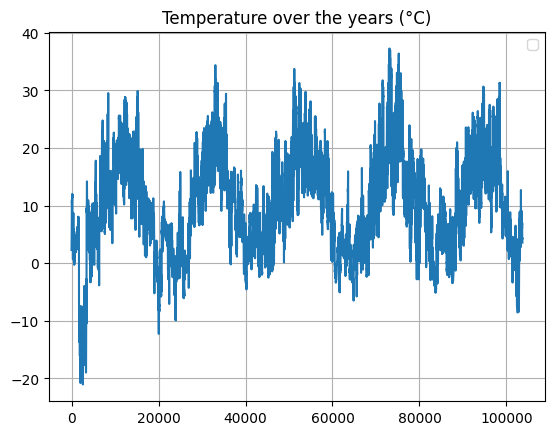

In [ ]:
plot_series(data['T (degC)'], data['T (degC)'], label='', title='Temperature over the years (°C)')

We can observe the seasonality of 5 years on the above plot. However, the plot is noisy. Let's use moving average to capture the short-term fluctuations while focusing on longer trends.

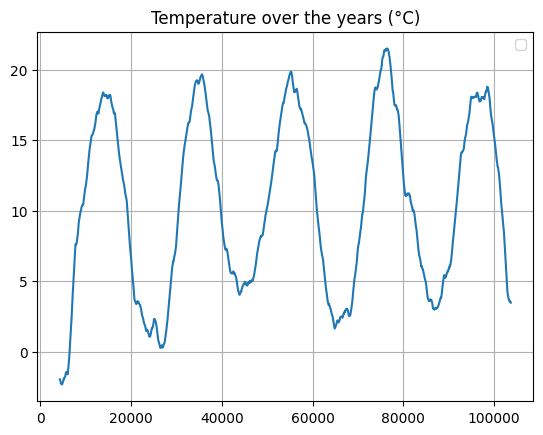

In [ ]:
# Use the moving average 6 observations per hours * 24 hours in a day * 30 days a month.
T_mov_avg = data['T (degC)'].rolling(window=4320).mean()
plot_series(T_mov_avg, T_mov_avg, label='', title='Temperature over the years (°C)')

The plot looks much neater after removing the 10-minute observations over 24 hours and the 30 observations per day. Now, let's zoom in to examine the first seasonal cycle, focusing on values from 0 to 20,000.

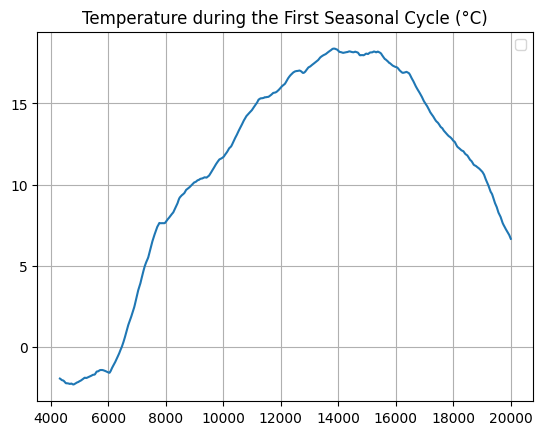

In [ ]:
plot_series(T_mov_avg[0:20000], T_mov_avg.iloc[0:20000], label='', title='Temperature during the First Seasonal Cycle (°C)')

**Temperature over the Years**

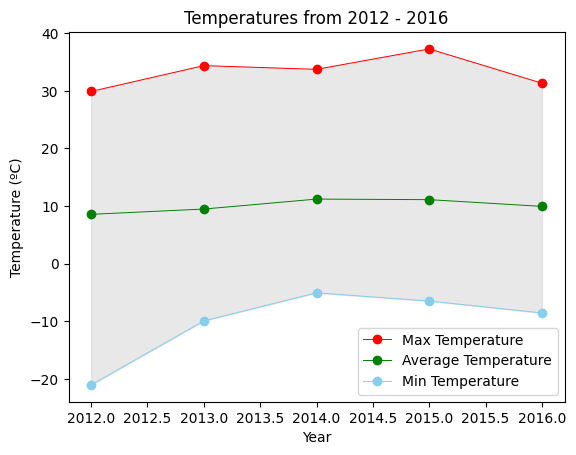

In [ ]:
# Plot Temperature Values over the Years.

max_temp_by_year = data.groupby('Year')['T (degC)'].max()
avg_temp_by_year = data.groupby('Year')['T (degC)'].mean()
min_temp_by_year = data.groupby('Year')['T (degC)'].min()

max_temp_by_year.plot(marker='o', color='red', label="Max Temperature", linewidth=0.7)
avg_temp_by_year.plot(marker='o', color='green', label="Average Temperature", linewidth=0.7)
min_temp_by_year.plot(marker='o', color='skyblue', label="Min Temperature", linewidth=0.7)

# Fill the area between minimum and maximum temperatures with a light grey color.
plt.fill_between(max_temp_by_year.index, max_temp_by_year, min_temp_by_year, color='lightgrey', alpha=0.5)

plt.title("Temperatures from 2012 - 2016")
plt.ylabel('Temperature (ºC)')
plt.legend()

The highest temperature was observed in 2015, while the lowest temperature was observed in 2012.

# Fixed Partitioning for Statistical Methods based Forecasting

---

This section outlines a simple method to split our temperature data into two parts: one for training our forecasting model and another for testing its accuracy. We start by checking how many observations we have for each year. Then, we pick data from 2012 to 2014 for training, while the rest is kept aside for validation. This helps us ensure our model learns from past data and can accurately predict future temperatures. Finally, we visualize both sets of data to better understand them.

In [ ]:
# Display the count of observations in each year.
data["Year"].value_counts()

Year
2012.0    20736
2013.0    20736
2014.0    20736
2016.0    20736
2015.0    20724
Name: count, dtype: int64

In [ ]:
# Add the counts of observations in years 2012 to 2014.
n_train_samples = (data[data["Year"] == 2012].shape[0] +
                 data[data["Year"] == 2013].shape[0] +
                 data[data["Year"] == 2014].shape[0])

n_val_samples = (data[data["Year"] == 2015].shape[0] +
               data[data["Year"] == 2016].shape[0])

print('Training samples:', n_train_samples)
print('Validation samples:', n_val_samples)

Training samples: 62208
Validation samples: 41460


In [ ]:
X_train = data[:n_train_samples]
X_val = data[n_train_samples:]

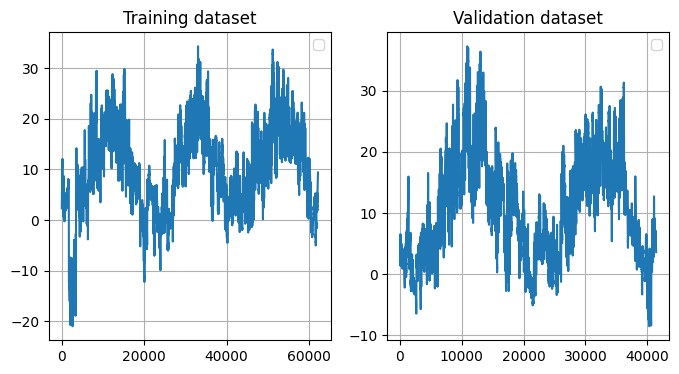

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

plt.sca(ax[0])
plot_series(X_train['T (degC)'], X_train['T (degC)'], label='', title='Training dataset')

plt.sca(ax[1])
plot_series(X_val['T (degC)'], X_val['T (degC)'], label='', title='Validation dataset')

As can be observed, seasonality has been maintained in the validation dataset.

# Statistical Forecast Methods

---

This section presents various statistical forecasting methods applied to temperature data, starting with the Naive Forecast. Here, we compute predictions based on the last observed temperature, comparing them with actual values to assess accuracy. Moving Average Forecasting follows, where we calculate the average temperature over a defined window size, observing its performance against the Naive Forecast. Next, the Differenced Moving Average Forecast is introduced, involving differencing to remove trends and seasonality before applying a moving average. We then assess its accuracy and compare it to the Naive Forecast. Lastly, we enhance the Differenced Moving Average Forecast by incorporating a smoothing technique to further refine predictions, evaluating its performance against the Naive Forecast as well. Through these methods, we aim to identify the most effective forecasting approach for temperature data.

**Naive Forecast**

---
A naive forecast is one of the simplest forecasting techniques where future values are predicted based solely on the observed values in the past. In other words, it assumes that the next value will be the same as the previous time step without considerations for seasonality, trends, or other external factors.

In [ ]:
# Generate the naive forecast.
naive_forecast = data['T (degC)'].iloc[n_train_samples - 1: -1]

# Define a random time step to observe.
time_step = 100

# Print values.
print(f"Ground truth at time step {time_step}: {X_val['T (degC)'].iloc[time_step]}")
print(f"Prediction at time step {time_step + 1}: {naive_forecast.iloc[time_step + 1]}")

Ground truth at time step 100: 2.93
Prediction at time step 101: 2.93


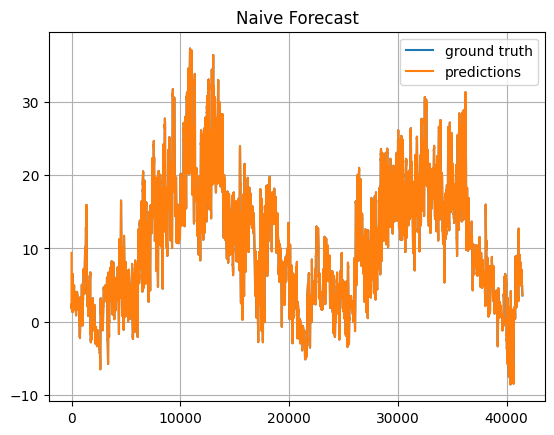

In [ ]:
# Visualize the ground truth versus predictions.

plot_series(X_val['T (degC)'], X_val['T (degC)'], label='ground truth', title='Naive Forecast')
plot_series(naive_forecast, naive_forecast, label='predictions', title='Naive Forecast')

It's difficult to discern that the predicted values are one time-step ahead of the actual values. So, we will zoom in on the plot to provide better clarity by plotting first 150 values.

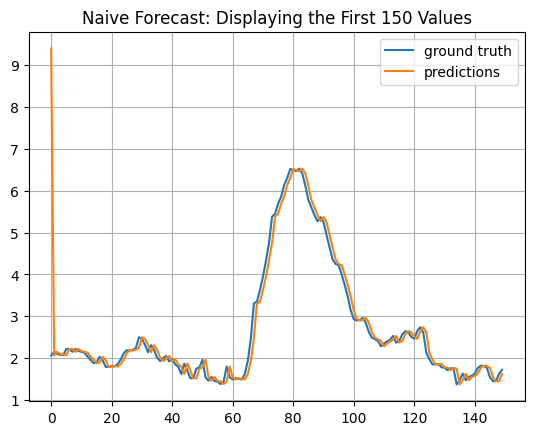

In [ ]:
# Visualize the ground truth versus predictions of the first 150 values.

plot_series(X_val['T (degC)'].iloc[0:150], X_val['T (degC)'].iloc[0:150], label='ground truth', title='Naive Forecast: Displaying the First 150 Values')
plot_series(naive_forecast.iloc[0:150], naive_forecast.iloc[0:150], label='predictions', title='Naive Forecast: Displaying the First 150 Values')

Now we can easily observe that the predicted values are one time-step ahead of the actual values.

In [ ]:
from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error

# Calculate the errors between the ground truth and the predictions in the validation period.

nf_mse = mean_squared_error(X_val['T (degC)'], naive_forecast).numpy()
nf_mae =mean_absolute_error(X_val['T (degC)'], naive_forecast).numpy()

print('Naive Forecast:')
print('\tMSE:', nf_mse)
print('\tMAE:', nf_mae)

Naive Forecast:
	MSE: 0.07668507959479016
	MAE: 0.17091075735648817


These values will establish our baseline, against which we'll evaluate the performance of subsequent statistical models.

**Moving Average Forecast**

---
Moving average is a forecasting technique that predicts future values by averaging a fixed number of past observations to smooth out short-term fluctuations and highlight longer-term trends.


In [ ]:
window_size = 12

# Create moving average of the entire series based on the defined window size.
moving_avg = data['T (degC)'].rolling(window=window_size).mean()

# Slice the prediction points corresponding to the validation set time steps.
moving_avg = moving_avg.iloc[n_train_samples:]

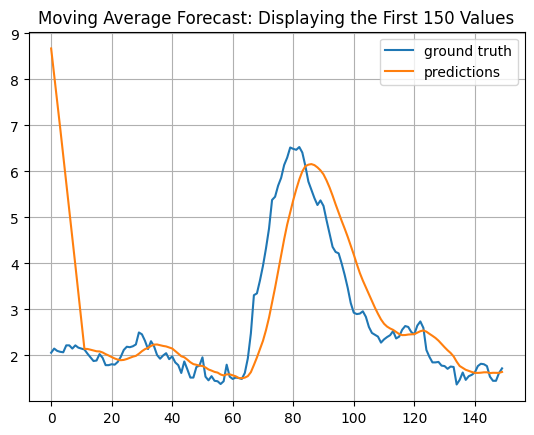

In [ ]:
# Visualize the ground truth versus predictions of the first 150 values.

plot_series(X_val['T (degC)'].iloc[0:150], X_val['T (degC)'].iloc[0:150], label='ground truth', title='Moving Average Forecast: Displaying the First 150 Values')
plot_series(moving_avg.iloc[0:150], moving_avg.iloc[0:150], label='predictions', title='Moving Average Forecast: Displaying the First 150 Values')

In [ ]:
# Calculate the errors between the ground truth and the predictions in the validation period.

ma_mse = mean_squared_error(X_val['T (degC)'], moving_avg).numpy()
ma_mae = mean_absolute_error(X_val['T (degC)'], moving_avg).numpy()

print('Moving Average:')
print('\tMSE:', ma_mse)
print('\tMAE:', ma_mae)

Moving Average:
	MSE: 0.8671805253725143
	MAE: 0.65908385592539


In [ ]:
if (ma_mse < nf_mse) and (ma_mae < nf_mae):
  print("Moving Average Forecasting is performing better than Naive Forecasting.")
elif (ma_mse > nf_mse) and (ma_mae > nf_mae):
  print("Moving Average Forecasting is performing worse than Naive Forecasting.")
else:
  print("Moving Average Forecasting is performing equal to Naive Forecasting.")

Moving Average Forecasting is performing worse than Naive Forecasting.


**Differenced Moving Average Forecast**

---


Differencing is a time series transformation technique that subtracts the current observation from a previous one to achieve stationarity by removing trends and seasonality.

Given a seasonality period of 365 days, you will subtract the value at time *t-365* from the value at time *t*.

In [ ]:
# Difference the entire series based on the defined periods.
periods = 365
diff_series = data['T (degC)'].diff(periods=periods)

# Slice the prediction points corresponding to the validation set time steps.
diff_series = diff_series.iloc[n_train_samples:]

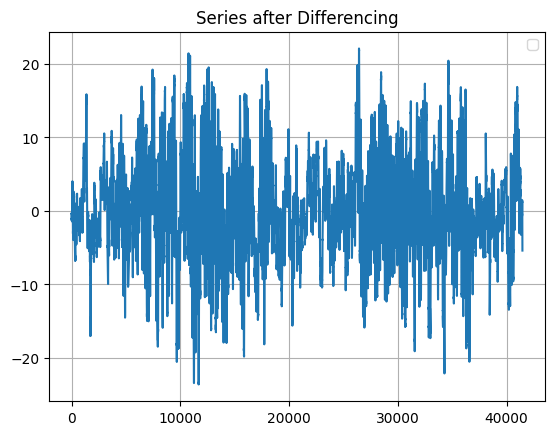

In [ ]:
# Visualize the series after differencing.

plot_series(diff_series, diff_series, label='', title='Series after Differencing')

After differencing, it seems like both the trend and seasonality have been removed. Therefore, we'll attempt to use a moving average again. In this comparison, *diff_series* represents the ground truth, while *diff_moving_avg* represents the prediction array.

In [ ]:
# Create moving average based on the defined window size.
diff_moving_avg = diff_series.rolling(window=window_size).mean()

print('Null values after creating the moving average:', diff_moving_avg.isnull().sum())

Null values after creating the moving average: 11


When computing a moving average, the first few values of the series will not have enough previous values to calculate the average. Therefore, we will fill NaN values with the next non-null value.

In [ ]:
# Fill NaN values with the next non-null value.
diff_moving_avg = diff_moving_avg.bfill()
diff_moving_avg.isnull().sum()

0

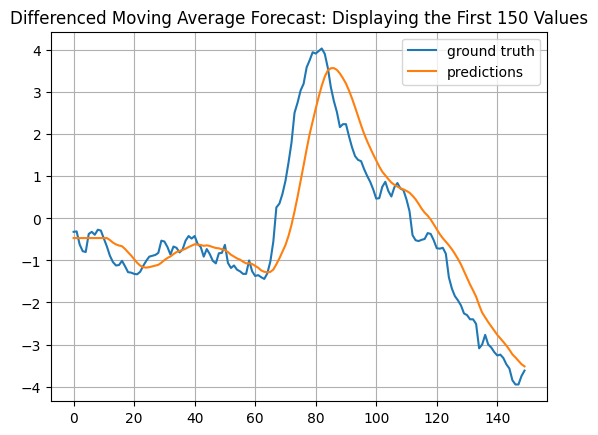

In [ ]:
# Visualize the ground truth versus predictions of the first 150 values.

plot_series(diff_series[0: 150], diff_series[0: 150], label='ground truth', title='Differenced Moving Average Forecast: Displaying the First 150 Values')
plot_series(diff_moving_avg[0: 150], diff_moving_avg[0: 150], label='predictions', title='Differenced Moving Average Forecast: Displaying the First 150 Values')

In [ ]:
# Add the trend and seasonality from the original series
diff_moving_avg_plus_past = data['T (degC)'].iloc[n_train_samples - periods: -periods].values + diff_moving_avg

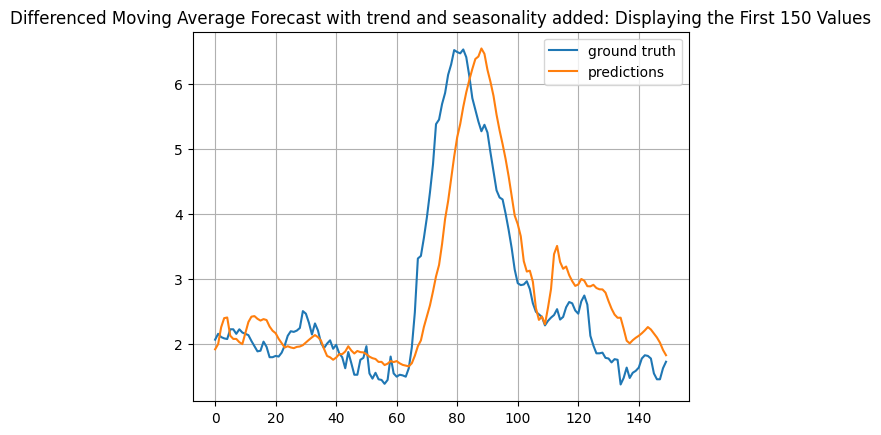

In [ ]:
# Visualize the ground truth versus predictions of the first 150 values.

plot_series(X_val['T (degC)'].iloc[0:150], X_val['T (degC)'].iloc[0:150], label='ground truth', title='Differenced Moving Average Forecast with trend and seasonality added: Displaying the First 150 Values')
plot_series(diff_moving_avg_plus_past.iloc[0:150], diff_moving_avg_plus_past.iloc[0:150], label='predictions', title='Differenced Moving Average Forecast with trend and seasonality added: Displaying the First 150 Values')

In [ ]:
# Calculate the errors between the ground truth and the predictions in the validation period.

dif_ma_mse = mean_squared_error(X_val['T (degC)'], diff_moving_avg_plus_past).numpy()
dif_ma_mae = mean_absolute_error(X_val['T (degC)'], diff_moving_avg_plus_past).numpy()

print('Differenced Moving Average with Trend and Seasonality Restored:')
print('\tMSE:', dif_ma_mse)
print('\tMAE:', dif_ma_mae)

Differenced Moving Average with Trend and Seasonality Restored:
	MSE: 2.4299055341828804
	MAE: 1.165477850136678


In [ ]:
if (dif_ma_mse < nf_mse) and (dif_ma_mae < nf_mae):
  print("Differenced Moving Average Forecasting is performing better than Naive Forecasting.")
elif (dif_ma_mse > nf_mse) and (dif_ma_mae > nf_mae):
  print("Differenced Moving Average Forecasting is performing worse than Naive Forecasting.")
else:
  print("Differenced Moving Average Forecasting is performing equal to Naive Forecasting.")

Differenced Moving Average Forecasting is performing worse than Naive Forecasting.


**Differenced Moving Average Forecast with Smoothing**

---
To smooth the temperature data at each time step, we'll use a centered window approach. This method involves calculating the average of values from both past and future time steps to determine the smoothed value at the current time step. For instance, to smooth the data point at t = 365, we would compute the average of the values from t = 359 to t = 370, with the window size of 11. Later, we will add differenced moving average to improve the accuracy of predictions.

In [ ]:
# Get past and future values for each time step to apply a centered moving average approach.
diff_moving_avg_plus_smooth_past = data['T (degC)'].iloc[n_train_samples  - 370 + 11:-359]

In [ ]:
# Create moving average of the series based on the defined window size.
diff_moving_avg_plus_smooth_past = diff_moving_avg_plus_smooth_past.rolling(window=11).mean()

print('Null values after creating the moving average:', diff_moving_avg_plus_smooth_past.isnull().sum())

Null values after creating the moving average: 10


In [ ]:
# Fill NaN values with the next non-null value.
diff_moving_avg_plus_smooth_past = diff_moving_avg_plus_smooth_past.bfill()
diff_moving_avg_plus_smooth_past.isnull().sum()

0

In [ ]:
# Combine the smoothed past values with the previously calculated time differenced moving average.
diff_moving_avg_plus_smooth_past = diff_moving_avg + diff_moving_avg_plus_smooth_past

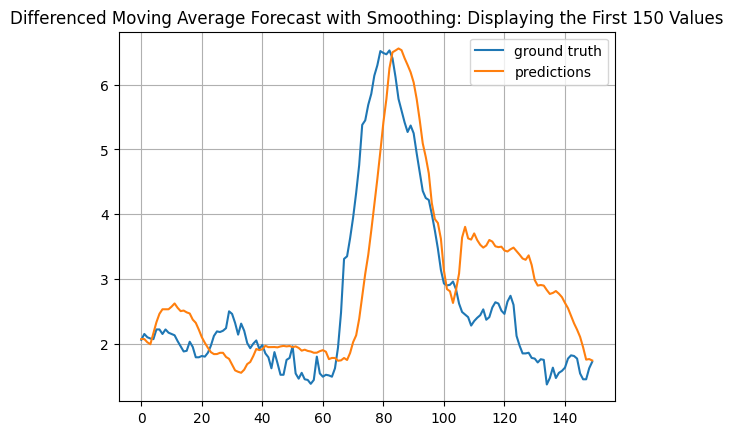

In [ ]:
# Visualize the ground truth versus predictions of the first 150 values.

plot_series(X_val['T (degC)'].iloc[0:150], X_val['T (degC)'].iloc[0:150], label='ground truth', title='Differenced Moving Average Forecast with Smoothing: Displaying the First 150 Values')
plot_series(diff_moving_avg_plus_smooth_past.iloc[0:150], diff_moving_avg_plus_smooth_past.iloc[0:150], label='predictions', title='Differenced Moving Average Forecast with Smoothing: Displaying the First 150 Values')

In [ ]:
dif_s_ma_mse = mean_squared_error(X_val['T (degC)'], diff_moving_avg_plus_smooth_past).numpy()
dif_s_ma_mae = mean_absolute_error(X_val['T (degC)'], diff_moving_avg_plus_smooth_past).numpy()

print('Differenced Moving Average Forecasting with Smoothing:')
print('\tMSE:', dif_s_ma_mse)
print('\tMAE:', dif_s_ma_mae)

Differenced Moving Average Forecasting with Smoothing:
	MSE: 5.594860817186579
	MAE: 1.774006070107734


In [ ]:
if (dif_s_ma_mse < nf_mse) and (dif_s_ma_mae < nf_mae):
  print("Differenced Moving Average Forecasting after Smoothing is performing better than Naive Forecasting.")
elif (dif_s_ma_mse > nf_mse) and (dif_s_ma_mae > nf_mae):
  print("Differenced Moving Average Forecasting after Smoothing is performing worse than Naive Forecasting.")
else:
  print("Differenced Moving Average Forecasting after Smoothing is performing equal to Naive Forecasting.")

Differenced Moving Average Forecasting after Smoothing is performing worse than Naive Forecasting.


# Fixed Partitioning for Neural Network based Forecasting

---
This section outlines a simple method to split our temperature data into two parts: one for training our forecasting model and another for testing its accuracy. When splitting time series data, two key considerations are crucial:

- Ensure the split is in chronological order.
- Account for seasonality to guarantee each period encompasses a complete set of seasons. This prevents uneven representation of months or other periodic patterns in the data. This approach differs from traditional train-validation-test splits in the non-time series datasets.

Hence, we will utilize data from the years 2012 to 2014 for training our model. Subsequently, data from 2015 will be employed for validation, and data from 2016 will be used for testing.

In [ ]:
# Add the counts of observations in years 2012 to 2014.
n_train_samples = (data[data["Year"] == 2012].shape[0] +
                 data[data["Year"] == 2013].shape[0] +
                 data[data["Year"] == 2014].shape[0])

n_val_samples = data[data["Year"] == 2015].shape[0]
n_test_samples = data[data["Year"] == 2016].shape[0]

print('Training samples:', n_train_samples)
print('Validation samples:', n_val_samples)
print('Test Samples:', n_test_samples)

Training samples: 62208
Validation samples: 20724
Test Samples: 20736


In [ ]:
# Create the features dataset excluding the 'Date Time' feature.
raw_data = data[['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)']]

# Create the label series
temperature = data['T (degC)']

# Data Preprocessing

---
This section presents the methodology to  normalize the data using ScikitLearn's *MinMaxScaler*. MinMaxScaler is preferred over StandardScaler in the following scenarios:

- When the data is not normally distributed.
- When training and predicting with neural networks.
- When features have different units, indicating varying scales.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(raw_data)

# Sequence Generation

---
This section presents the use of TensorFlow's *timeseries_dataset_from_array* to create sequences from the input array data based on the specified sequence_length for training, validation and test datasets.

In [ ]:
from tensorflow.keras.utils import timeseries_dataset_from_array

# Downsample data from every 10 minutes to every hour.
sampling_rate = 6

# Consider historical weather data spanning 5 days (equivalent to 120 hours).
sequence_length = 120

# Predicting the temperature 24 hours in the future.
prediction_horizon = 24
delay = sampling_rate * (sequence_length + prediction_horizon - 1)

batch_size = 256

train_dataset = timeseries_dataset_from_array(
 normalized_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=0,
 end_index=n_train_samples)

val_dataset = timeseries_dataset_from_array(
 normalized_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=n_train_samples,
 end_index=n_train_samples + n_val_samples
 )

test_dataset = timeseries_dataset_from_array(
 normalized_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=False,   # Setting shuffle=False ensures consistent metrics comparison between .evaluate method and manual calculations,
                  # as shuffling batches may affect results.
 batch_size=batch_size,
 start_index=n_train_samples + n_val_samples
)

# The full dataset will be used to train the best model that we will select.
full_dataset = timeseries_dataset_from_array(
 normalized_data[:-delay],
 targets=temperature[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=n_train_samples + n_val_samples)

In [ ]:
for samples, targets in train_dataset:
  print('Training dataset:')
  print("\tSamples shape", samples.shape)
  print("\tTarget shape", targets.shape)
  break

for samples, targets in val_dataset:
  print('Validation dataset:')
  print("\tSamples shape", samples.shape)
  print("\tTarget shape", targets.shape)
  break

for samples, targets in val_dataset:
  print('Test dataset:')
  print("\tSamples shape", samples.shape)
  print("\tTarget shape", targets.shape)
  break

for samples, targets in full_dataset:
  print('Full dataset:')
  print("\tSamples shape", samples.shape)
  print("\tTarget shape", targets.shape)
  break

Training dataset:
	Samples shape (256, 120, 14)
	Target shape (256,)
Validation dataset:
	Samples shape (256, 120, 14)
	Target shape (256,)
Test dataset:
	Samples shape (256, 120, 14)
	Target shape (256,)
Full dataset:
	Samples shape (256, 120, 14)
	Target shape (256,)


In [ ]:
# Define input shape for the neural networks.
input_shape = ((sequence_length, raw_data.shape[-1]))
input_shape

(120, 14)

# Deep Learning Models

---

This section explores various deep learning models tailored for temperature forecasting. It begins with a Basic Neural Network utilizing a single hidden layer, employing the Huber loss function for robust training and Mean Absolute Error for performance evaluation. Moving forward, a Deep Neural Network with increased model capacity and two hidden layers is introduced to capture complex data patterns. Next, Single-Layer Long Short Term Memory (LSTM) and its regularized variant are employed to leverage temporal dependencies in sequential data effectively. The Bi-Directional LSTM further enhances temporal modeling by processing data in both forward and backward directions. Stacked Gated Recurrent Units (GRUs) provide an alternative to LSTMs, offering a simpler architecture while maintaining effective sequential data processing. Additionally, a hybrid architecture combining Convolutional Layer Network with stacked GRUs and Fully Connected Layers is proposed to leverage both spatial and temporal features. Observations from preliminary experiments guide further refinement, focusing on the Basic Neural Network and the Deep Neural Network with regularization, learning rate scheduling, and increased model complexity for improved performance.

**Basic Neural Network**

---
We are using a basic model with just one hidden layer. Instead of the typical Mean Squared Error (MSE) loss function, we have chosen the Huber loss function. The Huber loss is beneficial because it is less sensitive to outliers, yet it remains differentiable at zero, making it a robust choice for training.

For evaluating the model's performance, we are using the Mean Absolute Error (MAE) metric. MAE is useful because it provides error values on a linear scale, which means the errors are directly interpretable in the same units as the original data. This makes understanding and analyzing the errors more straightforward.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(
 monitor="val_loss",
 patience=3,
 ),
 ModelCheckpoint(
 filepath="checkpoint_path.keras",
 monitor="val_loss",
 save_best_only=True,
 )
]

epochs = 30

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Input, Model

inputs = Input(shape=input_shape)

# Flatten the input from a multi-dimension array to be fed to the neural network.
x = Flatten()(inputs)
x = Dense(16, activation="relu")(x)

outputs = Dense(1)(x)

model1 = Model(inputs, outputs, name='Basic_NN')

In [ ]:
model1.summary()

Model: "Basic_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 flatten (Flatten)           (None, 1680)              0         
                                                                 
 dense (Dense)               (None, 16)                26896     
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 26913 (105.13 KB)
Trainable params: 26913 (105.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model1.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
history1 = model1.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 15s 55ms/step - loss: 3.3513 - mae: 3.8193 - val_loss: 2.9139 - val_mae: 3.3857
Epoch 2/30
241/241 [==============================] - 13s 54ms/step - loss: 2.4431 - mae: 2.9008 - val_loss: 2.7054 - val_mae: 3.1698
Epoch 3/30
241/241 [==============================] - 13s 54ms/step - loss: 2.3047 - mae: 2.7607 - val_loss: 2.7880 - val_mae: 3.2564
Epoch 4/30
241/241 [==============================] - 13s 53ms/step - loss: 2.2301 - mae: 2.6853 - val_loss: 2.5667 - val_mae: 3.0296
Epoch 5/30
241/241 [==============================] - 11s 45ms/step - loss: 2.1905 - mae: 2.6449 - val_loss: 2.5972 - val_mae: 3.0611
Epoch 6/30
241/241 [==============================] - 11s 44ms/step - loss: 2.1662 - mae: 2.6202 - val_loss: 2.5398 - val_mae: 3.0018
Epoch 7/30
241/241 [==============================] - 12s 50ms/step - loss: 2.1499 - mae: 2.6041 - val_loss: 2.5376 - val_mae: 2.9997
Epoch 8/30
241/241 [==============================] - 13s 51ms

The current model is overfitting. Next, we'll consider implementing a Deep Neural Network.

In [ ]:
print(f"Test MAE: {model1.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 3s 31ms/step - loss: 2.1093 - mae: 2.5660
Test MAE: 2.57


**Deep Neural Network**

---

We are using a Deep Neural Network (DNN) with two hidden layers. To enhance the model's capacity to learn complex patterns, we have increased the number of neurons in each hidden layer. This means the network can capture more intricate relationships in the data, potentially leading to better performance on more complex tasks.

In [ ]:
# Flatten the input from a multi-dimension array to be fed to the neural network.
x = Flatten()(inputs)
x = Dense(32, activation="relu")(x)
x = Dense(32, activation="relu")(x)

outputs = Dense(1)(x)

model2 = Model(inputs, outputs, name='Deep_NN')

In [ ]:
model2.summary()

Model: "Deep_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 flatten_2 (Flatten)         (None, 1680)              0         
                                                                 
 dense_7 (Dense)             (None, 32)                53792     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 54881 (214.38 KB)
Trainable params: 54881 (214.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
history2 = model2.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 14s 51ms/step - loss: 3.2492 - mae: 3.7150 - val_loss: 2.8657 - val_mae: 3.3346
Epoch 2/30
241/241 [==============================] - 12s 50ms/step - loss: 2.2965 - mae: 2.7530 - val_loss: 2.5871 - val_mae: 3.0508
Epoch 3/30
241/241 [==============================] - 12s 50ms/step - loss: 2.1612 - mae: 2.6150 - val_loss: 2.5847 - val_mae: 3.0456
Epoch 4/30
241/241 [==============================] - 12s 47ms/step - loss: 2.0960 - mae: 2.5480 - val_loss: 2.5919 - val_mae: 3.0567
Epoch 5/30
241/241 [==============================] - 12s 50ms/step - loss: 2.0523 - mae: 2.5032 - val_loss: 2.6029 - val_mae: 3.0672
Epoch 6/30
241/241 [==============================] - 12s 49ms/step - loss: 2.0010 - mae: 2.4487 - val_loss: 2.8526 - val_mae: 3.3208


In [ ]:
print(f"Test MAE: {model2.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 2s 29ms/step - loss: 2.3447 - mae: 2.8049
Test MAE: 2.80


The current model shows signs of overfitting and performs worse than the previous one. To address this, we'll experiment with a single-layer Long Short-Term Memory (LSTM) model.

**Single-Layer Long Short Term Memory**

---
We are using a basic Long Short Term Memory (LSTM) model with just one layer. LSTM is a type of recurrent neural network (RNN) designed to better capture temporal dependencies and patterns in sequential data, making it particularly effective for tasks involving time series. The single-layer LSTM will help us explore how well the model can handle sequences with its ability to maintain long-term dependencies.

In [ ]:
from tensorflow.keras.layers import LSTM

x = LSTM(16)(inputs)

outputs = Dense(1)(x)

model3 = Model(inputs, outputs, name='Basic_LSTM')

In [ ]:
model3.summary()

Model: "Basic_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 lstm (LSTM)                 (None, 16)                1984      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model3.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
history3 = model3.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 15s 53ms/step - loss: 7.0786 - mae: 7.5612 - val_loss: 5.8336 - val_mae: 6.3173
Epoch 2/30
241/241 [==============================] - 13s 53ms/step - loss: 4.4719 - mae: 4.9447 - val_loss: 4.4094 - val_mae: 4.8837
Epoch 3/30
241/241 [==============================] - 15s 63ms/step - loss: 3.4396 - mae: 3.9040 - val_loss: 3.8037 - val_mae: 4.2750
Epoch 4/30
241/241 [==============================] - 13s 53ms/step - loss: 2.8985 - mae: 3.3585 - val_loss: 3.3823 - val_mae: 3.8497
Epoch 5/30
241/241 [==============================] - 13s 52ms/step - loss: 2.5893 - mae: 3.0461 - val_loss: 3.1852 - val_mae: 3.6502
Epoch 6/30
241/241 [==============================] - 13s 52ms/step - loss: 2.4268 - mae: 2.8823 - val_loss: 3.1172 - val_mae: 3.5824
Epoch 7/30
241/241 [==============================] - 13s 54ms/step - loss: 2.3946 - mae: 2.8506 - val_loss: 2.9854 - val_mae: 3.4475
Epoch 8/30
241/241 [==============================] - 14s 59ms

This model also exhibits overfitting, albeit performing slightly better than the previous one. To tackle this, we'll explore another LSTM model with increased neurons and dropout regularization.

In [ ]:
print(f"Test MAE: {model3.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 2s 24ms/step - loss: 2.2393 - mae: 2.6965
Test MAE: 2.70


**Single-Layer Regularized LSTM**

---
In this exploration, we are using an LSTM model that includes regularization through dropout and has an increased number of neurons. Dropout regularization helps prevent overfitting by randomly setting a fraction of the input units to zero during training, which forces the model to learn more robust features. Increasing the number of neurons in the LSTM layer enhances the model's capacity to learn more complex patterns in the sequential data. This combination aims to improve the model's performance and generalization.

In [ ]:
from tensorflow.keras.layers import Dropout

x = LSTM(32, recurrent_dropout=0.25, )(inputs)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model4 = Model(inputs, outputs, name='Regularized_LSTM')

In [ ]:
model4.summary()

Model: "Regularized_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                6016      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6049 (23.63 KB)
Trainable params: 6049 (23.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model4.compile(optimizer='Adam',
               loss="Huber",
               metrics=["mae"])

We will define a learning rate schedulor that will change the learning rate every epoch.

In [ ]:
history4 = model4.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 85s 331ms/step - loss: 6.1777 - mae: 6.6599 - val_loss: 4.5098 - val_mae: 4.9862
Epoch 2/30
241/241 [==============================] - 81s 337ms/step - loss: 3.7907 - mae: 4.2623 - val_loss: 3.6133 - val_mae: 4.0852
Epoch 3/30
241/241 [==============================] - 80s 330ms/step - loss: 3.3235 - mae: 3.7917 - val_loss: 3.1299 - val_mae: 3.5948
Epoch 4/30
241/241 [==============================] - 79s 326ms/step - loss: 3.0575 - mae: 3.5230 - val_loss: 3.0038 - val_mae: 3.4657
Epoch 5/30
241/241 [==============================] - 80s 333ms/step - loss: 2.8976 - mae: 3.3618 - val_loss: 2.8738 - val_mae: 3.3399
Epoch 6/30
241/241 [==============================] - 79s 328ms/step - loss: 2.7948 - mae: 3.2585 - val_loss: 2.7008 - val_mae: 3.1598
Epoch 7/30
241/241 [==============================] - 79s 326ms/step - loss: 2.7196 - mae: 3.1821 - val_loss: 2.6944 - val_mae: 3.1558
Epoch 8/30
241/241 [==============================] - 7

In [ ]:
print(f"Test MAE: {model4.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 4s 56ms/step - loss: 2.2966 - mae: 2.7602
Test MAE: 2.76


This model shows improved performance compared to the previous one, though with signs of overfitting. Next, we'll explore use a Bi-Directional LSTM and incorporate regularization using dropout.

**Bi-Directional Regularized LSTM**

---
In this exploration, we are using a Bi-Directional LSTM model that includes regularization through dropout. Bi-Directional LSTM processes data in both forward and backward directions, capturing information from past and future states. Dropout regularization helps prevent overfitting by randomly setting a fraction of the input units to zero during training, which forces the model to learn more robust features.

In [ ]:
model7.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
from tensorflow.keras.layers import Bidirectional

x = Bidirectional(LSTM(32, recurrent_dropout=0.25))(inputs)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model7 = Model(inputs, outputs, name='Bi_Directonal_Regularized_LSTM')

In [ ]:
history7 = model7.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 150s 592ms/step - loss: 5.6892 - mae: 6.1697 - val_loss: 4.0100 - val_mae: 4.4842
Epoch 2/30
241/241 [==============================] - 141s 584ms/step - loss: 3.4957 - mae: 3.9660 - val_loss: 3.2212 - val_mae: 3.6900
Epoch 3/30
241/241 [==============================] - 140s 582ms/step - loss: 3.0867 - mae: 3.5538 - val_loss: 2.9420 - val_mae: 3.4077
Epoch 4/30
241/241 [==============================] - 141s 584ms/step - loss: 3.0637 - mae: 3.5303 - val_loss: 2.7593 - val_mae: 3.2227
Epoch 5/30
241/241 [==============================] - 141s 585ms/step - loss: 2.8318 - mae: 3.2964 - val_loss: 2.6581 - val_mae: 3.1178
Epoch 6/30
241/241 [==============================] - 140s 580ms/step - loss: 2.7321 - mae: 3.1950 - val_loss: 2.6094 - val_mae: 3.0681
Epoch 7/30
241/241 [==============================] - 140s 580ms/step - loss: 2.6471 - mae: 3.1089 - val_loss: 2.5848 - val_mae: 3.0426
Epoch 8/30
241/241 [============================

In [ ]:
print(f"Test MAE: {model7.evaluate(test_dataset)[1]:.2f}")

This model shows improved performance compared to the previous one, though with signs of overfitting. Next, we'll explore a different type of recurrent neural network (RNN) called Gated Recurrent Unit (GRU). We'll stack multiple GRU layers and incorporate regularization using dropout.

**Regularized Stacked Gated Recurrent Unit**

---
We are using a stacked Recurrent Neural Network (RNN) known as a Gated Recurrent Unit (GRU). GRUs are similar to LSTMs but have a simpler architecture, which can make them faster to train while still effectively capturing dependencies in sequential data. Additionally, we are applying dropout regularization to the GRU layers. This helps prevent overfitting by randomly dropping a fraction of the units during training, encouraging the model to learn more robust features. Combining GRUs with dropout aims to enhance the model's performance and generalization capabilities.

In [ ]:
from tensorflow.keras.layers import GRU

# We will set return_sequences = True so that the model returns an output for each time step (sequence to sequence approach)
x = GRU(32, recurrent_dropout=0.3, return_sequences=True)(inputs)
x = GRU(32, recurrent_dropout=0.3, return_sequences=True)(x)
x = GRU(32, recurrent_dropout=0.4, return_sequences=True)(x)

x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model5 = Model(inputs, outputs, name='Regularized_Stacked_GRU')

In [ ]:
model5.summary()

Model: "Regularized_Stacked_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 120, 14)]         0         
                                                                 
 gru_1 (GRU)                 (None, 120, 32)           4608      
                                                                 
 gru_2 (GRU)                 (None, 32)                6336      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10977 (42.88 KB)
Trainable params: 10977 (42.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.compile(optimizer='Adam',
               loss="mse",
               metrics=["mae"])

In [ ]:
history5 = model5.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 277s 1s/step - loss: 84.5472 - mae: 7.3420 - val_loss: 75.0365 - val_mae: 6.9936
Epoch 2/30
241/241 [==============================] - 266s 1s/step - loss: 76.1235 - mae: 6.9685 - val_loss: 74.8353 - val_mae: 6.9868
Epoch 3/30
241/241 [==============================] - 263s 1s/step - loss: 75.9246 - mae: 6.9599 - val_loss: 74.7782 - val_mae: 6.9851
Epoch 4/30
241/241 [==============================] - 263s 1s/step - loss: 75.7865 - mae: 6.9539 - val_loss: 74.9178 - val_mae: 6.9894
Epoch 5/30
241/241 [==============================] - 274s 1s/step - loss: 75.6851 - mae: 6.9495 - val_loss: 75.1267 - val_mae: 6.9958
Epoch 6/30
241/241 [==============================] - 264s 1s/step - loss: 75.6095 - mae: 6.9466 - val_loss: 74.8913 - val_mae: 6.9886


In [ ]:
print(f"Test MAE: {model5.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 18s 238ms/step - loss: 64.6032 - mae: 6.7801
Test MAE: 6.78


This model has performed worse than all others. Now, we'll experiment with a Convolutional Layer Network stacked with a single-layer GRU.

**Convolutional Layer Network stacked with a stacked GRUs and Fully Connected Layers**

---

We are combining a Convolutional Layer Network with a single-layer Gated Recurrent Unit (GRU). The convolutional layers are excellent at extracting spatial features from the time series data with local dependencies such as trends, cycles, seasonal patterns, and anomalies. After the convolutional layers extract these features, they are passed to the GRU layera, which can capture temporal dependencies and patterns in the sequential data. This combination allows the model to leverage both spatial and temporal features, enhancing its ability to handle complex data with both types of dependencies. Finally, the output from the stacked GRUs is fed into Fully Connected (Dense) Layers, which perform the final processing and transformation to produce the predictions. This architecture leverages the strengths of each component to effectively handle complex data with both spatial and temporal dependencies.

In [ ]:
from tensorflow.keras.layers import Conv1D

# Use 'causal' padding to ensure that the convolution operation only uses past and present information for each time step and not the future informatiom.
x = Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal')(inputs)

x = GRU(64, return_sequences=True, recurrent_dropout=0.3)(x)
x = GRU(64, return_sequences=True, recurrent_dropout=0.3)(x)
x = GRU(64)(x)

x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = Dense(32, activation='relu')(x)

x = Dropout(0.3)(x)

outputs = Dense(1)(x)

model6 = Model(inputs, outputs, name='Regularized_Stacked_GRU')

In [ ]:
model6.compile(optimizer='Adam',
               loss="mse",
               metrics=["mae"])

In [ ]:
history6 = model6.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks)

Epoch 1/30
241/241 [==============================] - 238s 814ms/step - loss: 40.1035 - mae: 4.6532 - val_loss: 14.9263 - val_mae: 3.0137
Epoch 2/30
241/241 [==============================] - 193s 802ms/step - loss: 18.5075 - mae: 3.2626 - val_loss: 13.7716 - val_mae: 2.9082
Epoch 3/30
241/241 [==============================] - 196s 814ms/step - loss: 17.2894 - mae: 3.1506 - val_loss: 13.9635 - val_mae: 2.9438
Epoch 4/30
241/241 [==============================] - 193s 802ms/step - loss: 16.5599 - mae: 3.0924 - val_loss: 13.7655 - val_mae: 2.9501
Epoch 5/30
241/241 [==============================] - 194s 804ms/step - loss: 16.1177 - mae: 3.0448 - val_loss: 13.8612 - val_mae: 2.9637
Epoch 6/30
241/241 [==============================] - 194s 804ms/step - loss: 15.6548 - mae: 2.9948 - val_loss: 14.8658 - val_mae: 3.0370
Epoch 7/30
241/241 [==============================] - 193s 798ms/step - loss: 15.2388 - mae: 2.9683 - val_loss: 15.1944 - val_mae: 3.0733


In [ ]:
print(f"Test MAE: {model6.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 10s 123ms/step - loss: 11.8103 - mae: 2.6947
Test MAE: 2.69


**Observation**

---
Considering that Model 1 (a basic neural network) and Model 2 (a deep neural network) performed much better than the other models, we will focus our efforts on fine-tuning these two models and comparing the results.

To improve performance, we will introduce regularization through Dropout and use learning rate schedulers to dynamically adjust the learning rate during training and increase neurons. This approach aims to enhance convergence and potentially yield better results.

**Basic Neural Network with Regularization and Learning Rate Scheduling**

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Set the initial rate.
learning_rate = 1e-4


callbacks_2 = [
 ModelCheckpoint(
 filepath="checkpoint_path.keras",
 monitor="val_loss",
 save_best_only=True
 ),

 # Set the learning scheduler that updated learning rate every epoch.
 LearningRateScheduler(lambda epoch: learning_rate * 10**(epoch / 10))
]

In [ ]:
# Flatten the input from a multi-dimension array to be fed to to the neural network.
x = Flatten()(inputs)
x = Dense(64, activation="relu")(x)
X = Dropout(0.6)

outputs = Dense(1)(x)

model1b = Model(inputs, outputs, name='Basic_NN_b')

In [ ]:
model1b.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
history1b = model1b.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks_2)

Epoch 1/30
241/241 [==============================] - 11s 40ms/step - loss: 4.3407 - mae: 4.8164 - val_loss: 3.5589 - val_mae: 4.0335 - lr: 1.0000e-04
Epoch 2/30
241/241 [==============================] - 10s 40ms/step - loss: 2.8380 - mae: 3.3027 - val_loss: 2.8956 - val_mae: 3.3661 - lr: 1.2589e-04
Epoch 3/30
241/241 [==============================] - 8s 34ms/step - loss: 2.5068 - mae: 2.9662 - val_loss: 2.7091 - val_mae: 3.1760 - lr: 1.5849e-04
Epoch 4/30
241/241 [==============================] - 10s 42ms/step - loss: 2.3518 - mae: 2.8083 - val_loss: 2.6547 - val_mae: 3.1202 - lr: 1.9953e-04
Epoch 5/30
241/241 [==============================] - 10s 42ms/step - loss: 2.2531 - mae: 2.7079 - val_loss: 2.6300 - val_mae: 3.0954 - lr: 2.5119e-04
Epoch 6/30
241/241 [==============================] - 10s 40ms/step - loss: 2.1863 - mae: 2.6407 - val_loss: 2.6247 - val_mae: 3.0888 - lr: 3.1623e-04
Epoch 7/30
241/241 [==============================] - 8s 34ms/step - loss: 2.1284 - mae: 2.5810

The next step involves plotting the training results to visualize the loss at each value of the learning rate.

(0.0001, 0.00059, 0.0, 5.0)

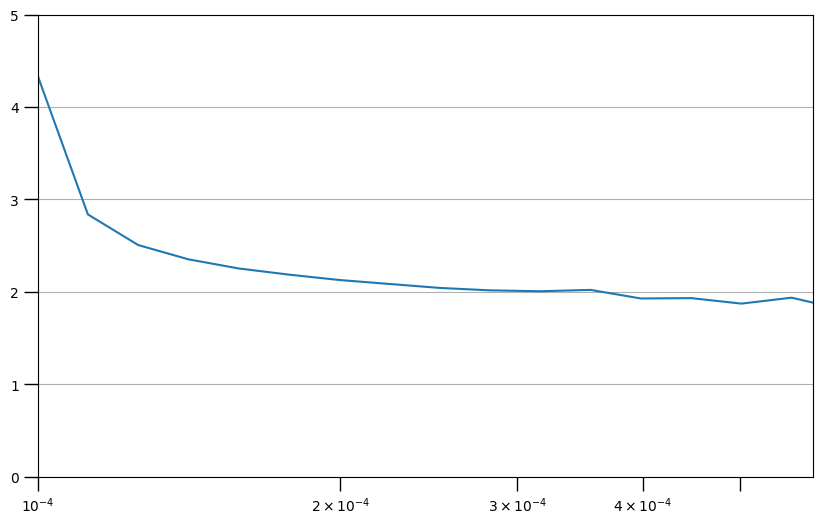

In [ ]:
# Create a range of learning rate
lrs = learning_rate * (10 ** (np.arange(epochs) / 20))

plt.figure(figsize=(10, 6))
plt.grid(True)

# Plot the training loss in log scale because learning rates often span several orders of magnitude.
plt.semilogx(lrs, history1b.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([learning_rate, 0.00059, 0, 5])

In [ ]:
# Flatten the input from a multi-dimension array to be fed to to the neural network.
x = Flatten()(inputs)
x = Dense(64, activation="relu")(x)
X = Dropout(0.5)(x)

outputs = Dense(1)(x)

model1c = Model(inputs, outputs, name='Basic_NN_c')

In [ ]:
from tensorflow.keras.optimizers import Adam

learning_rate = 5e-4

model1c.compile(optimizer=Adam(learning_rate=learning_rate),
               loss="Huber",
               metrics=["mae"])

In [ ]:
history1c = model1c.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset)

Epoch 1/30
241/241 [==============================] - 20s 78ms/step - loss: 3.1985 - mae: 3.6656 - val_loss: 2.7651 - val_mae: 3.2299
Epoch 2/30
241/241 [==============================] - 12s 49ms/step - loss: 2.3795 - mae: 2.8369 - val_loss: 2.6449 - val_mae: 3.1096
Epoch 3/30
241/241 [==============================] - 12s 50ms/step - loss: 2.2552 - mae: 2.7110 - val_loss: 2.6367 - val_mae: 3.1005
Epoch 4/30
241/241 [==============================] - 12s 49ms/step - loss: 2.1847 - mae: 2.6391 - val_loss: 2.6026 - val_mae: 3.0661
Epoch 5/30
241/241 [==============================] - 12s 48ms/step - loss: 2.1466 - mae: 2.6000 - val_loss: 2.5777 - val_mae: 3.0402
Epoch 6/30
241/241 [==============================] - 11s 42ms/step - loss: 2.1047 - mae: 2.5573 - val_loss: 2.6028 - val_mae: 3.0659
Epoch 7/30
241/241 [==============================] - 13s 53ms/step - loss: 2.0909 - mae: 2.5428 - val_loss: 2.5892 - val_mae: 3.0522
Epoch 8/30
241/241 [==============================] - 12s 51ms

In [ ]:
print(f"Test MAE: {model1c.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 5s 56ms/step - loss: 2.1366 - mae: 2.5950
Test MAE: 2.59


**Deep Neural Network with Regularization and Learning Rate Scheduling**

In [ ]:
# Set the initial rate.
learning_rate = 1e-5

callbacks_3 = [
 ModelCheckpoint(
 filepath="checkpoint_path.keras",
 monitor="val_loss",
 save_best_only=True
 ),

 # Set the learning scheduler that updated learning rate every epoch.
 LearningRateScheduler(lambda epoch: learning_rate * 10**(epoch / 10))
]

In [ ]:
# Flatten the input from a multi-dimension array to be fed to the neural network.
x = Flatten()(inputs)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model2b = Model(inputs, outputs, name='Deep_NN_b')

In [ ]:
model2b.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
history2b = model2b.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset,
                      callbacks=callbacks_3)

Epoch 1/30
241/241 [==============================] - 10s 40ms/step - loss: 2.9542 - mae: 3.4189 - val_loss: 4.1043 - val_mae: 4.5814 - lr: 1.0000e-05
Epoch 2/30
241/241 [==============================] - 10s 39ms/step - loss: 2.9160 - mae: 3.3802 - val_loss: 4.1193 - val_mae: 4.5958 - lr: 1.2589e-05
Epoch 3/30
241/241 [==============================] - 9s 35ms/step - loss: 2.8999 - mae: 3.3633 - val_loss: 4.1457 - val_mae: 4.6219 - lr: 1.5849e-05
Epoch 4/30
241/241 [==============================] - 10s 42ms/step - loss: 2.8834 - mae: 3.3471 - val_loss: 4.1464 - val_mae: 4.6226 - lr: 1.9953e-05
Epoch 5/30
241/241 [==============================] - 10s 42ms/step - loss: 2.8757 - mae: 3.3395 - val_loss: 4.1190 - val_mae: 4.5942 - lr: 2.5119e-05
Epoch 6/30
241/241 [==============================] - 12s 47ms/step - loss: 2.8876 - mae: 3.3507 - val_loss: 4.1351 - val_mae: 4.6111 - lr: 3.1623e-05
Epoch 7/30
241/241 [==============================] - 9s 37ms/step - loss: 2.8807 - mae: 3.3442

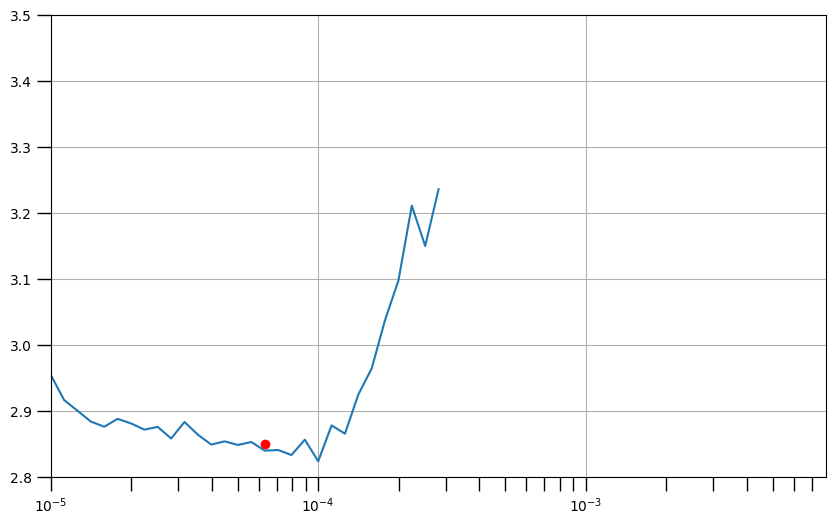

In [ ]:
# Create a range of learning rate
lrs = learning_rate * (10 ** (np.arange(epochs) / 20))

plt.figure(figsize=(10, 6))
plt.grid(True)

# Plot the training loss in log scale because learning rates often span several orders of magnitude.
plt.semilogx(lrs, history2b.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([learning_rate, 0.0079, 2.8, 3.5])

In [ ]:
# Flatten the input from a multi-dimension array to be fed to the neural network.
x = Flatten()(inputs)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)

outputs = Dense(1)(x)

model2c = Model(inputs, outputs, name='Deep_NN_b')

In [ ]:
model2c.compile(optimizer=Adam(learning_rate=6.3e-5),
               loss="Huber",
               metrics=["mae"])

In [ ]:
history2c = model2b.fit(train_dataset,
                      epochs=epochs,
                      validation_data=val_dataset)

Epoch 1/30
241/241 [==============================] - 10s 42ms/step - loss: 3.1601 - mae: 3.6253 - val_loss: 4.9963 - val_mae: 5.4738
Epoch 2/30
241/241 [==============================] - 10s 42ms/step - loss: 3.1926 - mae: 3.6588 - val_loss: 4.7975 - val_mae: 5.2778
Epoch 3/30
241/241 [==============================] - 8s 33ms/step - loss: 3.2509 - mae: 3.7167 - val_loss: 4.1514 - val_mae: 4.6262
Epoch 4/30
241/241 [==============================] - 10s 39ms/step - loss: 3.1342 - mae: 3.5986 - val_loss: 4.2858 - val_mae: 4.7608
Epoch 5/30
241/241 [==============================] - 11s 45ms/step - loss: 3.1078 - mae: 3.5725 - val_loss: 3.8500 - val_mae: 4.3225
Epoch 6/30
241/241 [==============================] - 9s 37ms/step - loss: 3.1492 - mae: 3.6148 - val_loss: 3.9525 - val_mae: 4.4250
Epoch 7/30
241/241 [==============================] - 10s 40ms/step - loss: 3.1211 - mae: 3.5867 - val_loss: 3.7534 - val_mae: 4.2236
Epoch 8/30
241/241 [==============================] - 10s 42ms/s

In [ ]:
print(f"Test MAE: {model2c.evaluate(test_dataset)[1]:.2f}")

75/75 [==============================] - 5s 43ms/step - loss: 10.4593 - mae: 10.9529
Test MAE: 10.95


Model 1 has demonstrated the best performance among all the models we tested. Therefore, we will use Model 1 to train on the entire dataset, which includes the training and validationdata.

In [ ]:
# Flatten the input from a multi-dimension array to be fed to to the neural network.
x = Flatten()(inputs)
x = Dense(64, activation="relu")(x)
X = Dropout(0.5)(x)

outputs = Dense(1)(x)

model1d = Model(inputs, outputs, name='Basic_NN_d')

In [ ]:
model1d.compile(optimizer="Adam",
               loss="Huber",
               metrics=["mae"])

In [ ]:
history1d = model1d.fit(full_dataset,
                      epochs=epochs)

Epoch 1/30
75/75 [==============================] - 3s 23ms/step - loss: 0.5425 - mae: 0.8985
Epoch 2/30
75/75 [==============================] - 2s 23ms/step - loss: 0.3900 - mae: 0.7215
Epoch 3/30
75/75 [==============================] - 2s 23ms/step - loss: 0.3910 - mae: 0.7230
Epoch 4/30
75/75 [==============================] - 2s 30ms/step - loss: 0.3971 - mae: 0.7314
Epoch 5/30
75/75 [==============================] - 3s 34ms/step - loss: 0.4584 - mae: 0.8096
Epoch 6/30
75/75 [==============================] - 2s 24ms/step - loss: 0.3920 - mae: 0.7249
Epoch 7/30
75/75 [==============================] - 2s 23ms/step - loss: 0.3757 - mae: 0.7032
Epoch 8/30
75/75 [==============================] - 2s 23ms/step - loss: 0.4099 - mae: 0.7491
Epoch 9/30
75/75 [==============================] - 2s 23ms/step - loss: 0.3977 - mae: 0.7339
Epoch 10/30
75/75 [==============================] - 2s 28ms/step - loss: 0.4109 - mae: 0.7511
Epoch 11/30
75/75 [==============================] - 3s 36m

# Evaluation

---

This section contains an evaluation of our model using the evaluate method on the test dataset, followed by prediction using the same model on the test dataset. Subsequently, an empty list test_targets is initialized to gather the targets from the test dataset. Through iteration over the test dataset, the targets are appended to this list, which is then concatenated into a single tensor using TensorFlow's concat function. Information about the type, length, and shape of the predictions (pred) and targets (test_targets) is printed for analysis. The prediction array is reshaped using NumPy's squeeze function, followed by the calculation of the MAE between predictions and targets. The difference between the MAE values calculated by the model and manually is computed and printed. Finally, the model's performance is compared to the baseline MAE of the naive forecast computed initially.

**MAE calculation model.evaluate() method**

In [ ]:
loss, mae_model = model1d.evaluate(test_dataset)
print(f"Mean Absolute Error: {mae_model}")

75/75 [==============================] - 2s 25ms/step - loss: 0.3657 - mae: 0.7019
Mean Absolute Error: 0.7018592953681946


**Manual MAE calculation using model.predict() method**

In [ ]:
pred = model1d.predict(test_dataset)

75/75 [==============================] - 2s 25ms/step


In [ ]:
import tensorflow as tf

# Initialize an empty list to collect targets
test_targets = []

# Iterate over the test_dataset and collect targets
for features, target in test_dataset:
    test_targets.append(target)

# Concatenate the list of targets into a single tensor
test_targets = tf.concat(test_targets, axis=0)

In [ ]:
print(f"The type of pred is {type(pred)}, it's length is {len(pred)} and it's shape is {pred.shape}")
print(f"The type of labels is {type(test_targets)}, it's length is {len(test_targets)} and it's shape is {test_targets.shape}")

The type of pred is <class 'numpy.ndarray'>, it's length is 19164 and it's shape is (19164, 1)
The type of labels is <class 'tensorflow.python.framework.ops.EagerTensor'>, it's length is 19164 and it's shape is (19164,)


The shapes are different for pred and test_targest. Therefore we will use np.squeeze to match the shape of test_targets.

In [ ]:
# Match the shape of pred with that of test_targets.
pred = np.squeeze(pred)
pred.shape

(19164,)

In [ ]:
mae_manual = np.mean(abs(pred - test_targets))
print(f"Mean Absolute Error: {mae_manual}")

Mean Absolute Error: 0.7018591515377453


In [ ]:
# Compare the MAE values obtained from the model with those calculated manually
diff = mae_model - mae_manual
print("The difference in the MAE values is:", diff)

The difference in the MAE values is: 1.4383044932841926e-07


It's evident that the gap between the MAE values obtained from the *model.evaluate()* method and those calculated manually using *model.predict()* is exceedingly small. We will now forecast the weather.

**Comparison with baseline of Naive Forecast**

In [2]:
mae_nf = 0.17091075735648817
mae_dl = 0.7018592953681946

diff = mae_dl - mae_nf
diff

0.5309485380117064

The naive forecast outperforms our model. To improve the model's performance, we can adjust the number of units, and experiment with different learning rates and batch sizes.

# Weather Forecast

---
This section contains code to predict the next temperature value using our trained model. First, it extracts the last sequence of normalized data points for prediction, which is represented by the variable last_sequence. This sequence is obtained from the last 120 data points of the normalized data. Next, the dimensions of last_sequence are expanded to match the input shape expected by the model using NumPy's expand_dims function. Once the data is prepared, the prediction is made using the predict method of the model1d object. Finally, the predicted temperature value is printed to the console.

In [ ]:
# Extract the last sequence of normalized data points for prediction
last_sequence = normalized_data[-120:, :]
last_sequence.shape

(120, 14)

In [ ]:
# Expand the dimensions to match the input shape expected by the model.
last_sequence = np.expand_dims(last_sequence, axis=0)
prediction = model1d.predict(last_sequence)

print('The next predicted temperature value is:', prediction)

1/1 [==============================] - 0s 32ms/step
The next predicted temperature value is: [[2.2443013]]
